In [1]:
%pylab inline
from jpype import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
JAVA_JVM= getDefaultJVMPath()
JAVA_OpenXAL='/opt/openxal/openxal-installation/lib/openxal/openxal.library-1.0.4.jar'
JAVA_ClassPath='-Djava.class.path='+JAVA_OpenXAL
JAVA_Flags='-ea'

In [3]:
startJVM(getDefaultJVMPath(), JAVA_Flags, JAVA_ClassPath)

In [4]:
_XMLDataManager = JClass("xal.smf.data.XMLDataManager")

In [5]:
Accelerator = _XMLDataManager.acceleratorWithPath('/opt/openxal/openxal-installation/etc/main.xal')

#Accelerator Methods:
http://xaldev.sourceforge.net/javadoc/xal/smf/Accelerator.html

In [6]:
print Accelerator.getAllSeqs()

[MEBT, GAP1, GAP2, GAP3, DTL, DTL1, DTL2, DTL3, DTL4, DTL5, DTL6, DTL7, DTL8, DTL9, DTL10, DTL11, DTL12, DTL13, DTL14, DTL15, DTL16, DTL17, DTL18, DTL19, DTL20, DTL21, DTL22, DTL23, DTL24, DTL25, DTL26, DTL27, DTL28, DTL29, DTL30, DTL31, DTL32, DTL33, DTL34, DTL35, DTL36, DTL37, DTL38, DTL39, DTL40, DTL41, DTL42, DTL43, DTL44, DTL45, DTL46, DTL47, DTL48, DTL49, DTL50, DTL51, DTL52, DTL53, DTL54, DTL55, DTL56, DTL57, DTL58, DTL59, DTL60, DTL61, DTL62, DTL63, DTL64, DTL65, DTL66, DTL67, DTL68, DTL69, DTL70, DTL71, DTL72, DTL73, DTL74, DTL75, DTL76, DTL77, DTL78, DTL79, DTL80, DTL81, DTL82, DTL83, DTL84, DTL85, DTL86, DTL87, DTL88, DTL89, DTL90, DTL91, DTL92, DTL93, DTL94, DTL95, DTL96, DTL97, DTL98, DTL99, DTL100, DTL101, DTL102, DTL103, DTL104, DTL105, DTL106, DTL107, DTL108, DTL109, DTL110, DTL111, DTL112, DTL113, DTL114, DTL115, DTL116, DTL117, DTL118, DTL119, DTL120, DTL121, DTL122, DTL123, DTL124, DTL125, DTL126, DTL127, DTL128, DTL129, DTL130, DTL131, DTL132, DTL133, DTL134, DTL135

In [7]:
print Accelerator.getComboSequences()

[from-mebt]


#Sequence Methods:
http://xaldev.sourceforge.net/javadoc/xal/smf/AcceleratorSeq.html

In [8]:
Sequence = Accelerator.getSequence('MEBT')
#Sequence = Accelerator.getComboSequence('from-mebt')

In [9]:
Sequence.getNodeCount()

44

In [10]:
print Sequence.nodes

[BPM1, QP1, ST1-VC, ST1-HC, BPM2, QP2, ST2-VC, ST2-HC, GAP1, BPM3, QP3, ST3-VC, ST3-HC, QP4, GAP2, BPM4, QP5, ST4-VC, ST4-HC, BPM5, QP6, ST5-VC, ST5-HC, BPM6, QP7, ST6-VC, ST6-HC, BPM7, QP8, ST7-VC, ST7-HC, GAP3, BPM8, QP9, ST8-VC, ST8-HC, BPM9, QP10, ST9-VC, ST9-HC, BPM10, QP11, ST10-VC, ST10-HC]


In [11]:
print Sequence.getAllNodesOfType('RF')
#print Sequence.getAllNodesOfType('Quad')

[GAP1, GAP2, GAP3]


In [12]:
Sequence.getLength()

3.840000000069995

#Node Methods:
http://xaldev.sourceforge.net/javadoc/xal/smf/AcceleratorNode.html

In [13]:
MyQuad = Sequence.getNodeWithId('QP1')

In [14]:
#MyQuad.getField()

In [15]:
#MyQuad.field

In [16]:
MyQuad.isMagnet()

1

In [17]:
Sequence.getNodeWithId('BPM1').isMagnet()

0

In [18]:
print MyQuad.handles

[fieldSet, cycleEnable, I_Set, fieldRB, I, psFieldRB, cycleState]


In [19]:
MyQuad.handles.toString()

u'[fieldSet, cycleEnable, I_Set, fieldRB, I, psFieldRB, cycleState]'

In [20]:
MyQuad.getChannel('fieldSet').getId()

u'QP1:FldSet'

In [21]:
MyQuad.getChannel('fieldRB').getId()

u'QP1:B'

#It is time to run a simulation

<H3>Setup generic parameters for an algorithm of simulation</H3>
http://xaldev.sourceforge.net/javadoc/xal/model/alg/EnvTrackerAdapt.html

In [22]:
_AlgorithFactory = JClass("xal.sim.scenario.AlgorithmFactory")

In [23]:
EnvelopeTracker = _AlgorithFactory.createEnvTrackerAdapt(Sequence)
#EnvelopeTracker = _AlgorithFactory.createEnvelopeTracker(Sequence)

In [24]:
EnvelopeTracker.setMaxIterations(1000)
EnvelopeTracker.setAccuracyOrder(1)
EnvelopeTracker.setErrorTolerance(0.001)

<H3>Setup a probe for the simulation (Beam)</H3>
http://xaldev.sourceforge.net/javadoc/xal/model/alg/EnvTrackerAdapt.html

In [25]:
_ProbeFactory = JClass("xal.sim.scenario.ProbeFactory")

In [26]:
Probe = _ProbeFactory.getEnvelopeProbe(Sequence, EnvelopeTracker)

<h3>Setup a model (Scenario) for the simulation</h3>
http://xaldev.sourceforge.net/javadoc/xal/sim/scenario/Scenario.html

In [27]:
_Scenario = JClass("xal.sim.scenario.Scenario")

In [28]:
Model = _Scenario.newScenarioFor(Sequence)

In [29]:
Model.setProbe(Probe)

In [30]:
Model.setSynchronizationMode('LIVE')
#Model.setSynchronizationMode('DESIGN')

In [31]:
Model.resync()

<h3>Run the simulation</h3>

In [32]:
Model.run()

<h3>Get back the probe (Beam)</h3>

In [33]:
Probe = Model.getProbe()

<h3>Get the trajectory</h3>
http://xaldev.sourceforge.net/javadoc/xal/model/probe/traj/Trajectory.html

In [34]:
Trajectory = Probe.getTrajectory()

In [35]:
StateElement = Trajectory.getStatesViaIndexer()

In [36]:
SigmaX=[]
SigmaY=[]
SigmaZ=[]
Positions=[]
for i in range(0,Trajectory.numStates()):
    Positions.append(StateElement[i].getPosition())
    SigmaX.append(StateElement[i].getCovarianceMatrix().getSigmaX())
    SigmaY.append(StateElement[i].getCovarianceMatrix().getSigmaY())
    SigmaZ.append(StateElement[i].getCovarianceMatrix().getSigmaZ())

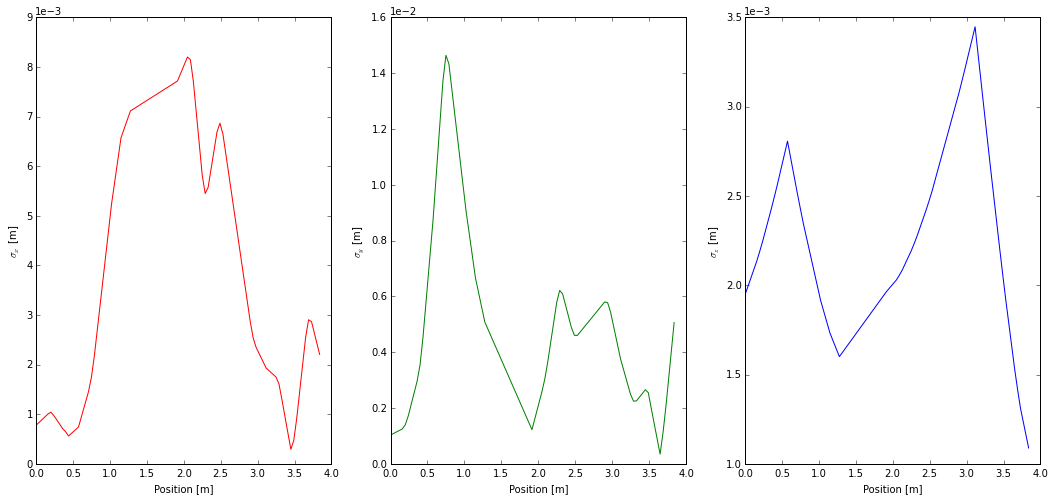

In [37]:
fig, (ax1, ax2, ax3) = subplots(ncols=3, figsize=(18,8))
ax1.set_xlabel('Position [m]')
ax1.set_ylabel('$\sigma_x$ [m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.plot(Positions, SigmaX, color='r')

ax2.plot(Positions, SigmaY, color='g')
ax2.set_xlabel('Position [m]')
ax2.set_ylabel('$\sigma_y$ [m]')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax3.plot(Positions, SigmaZ, color='b')
ax3.set_xlabel('Position [m]')
ax3.set_ylabel('$\sigma_z$ [m]')
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

show()

#A little break

<h3>What if we want to modify one variable?<BR>
We can use EPICS</h3>

In [38]:
from epics import caget, caput

In [39]:
caget('QP1:B')

20.0

In [40]:
caput('QP1:FldSet', 20)

1

In [41]:
caget('QP1:B')

20.0

#So why not to do it interactively?

In [42]:
from IPython.html.widgets import interact, interactive

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [43]:
def PlayWithQuad(QP1Field=-16.1578):
    caput('QP1:FldSet', QP1Field) # This is not part of OpenXAL, with this command we are changing the "Hardware".
#    MyQuad.setDfltField(QP1Field) # This modifies a variable in OpenXAL.
    Probe = _ProbeFactory.getEnvelopeProbe(Sequence, EnvelopeTracker)
    Model.setProbe(Probe)
    Model.resync()
    Model.run()
    Probe = Model.getProbe()
    
    Trajectory = Probe.getTrajectory()
    StateElement = Trajectory.getStatesViaIndexer()
    
    SigmaX=[]
    SigmaY=[]
    SigmaZ=[]
    Positions=[]
    for i in range(0,Trajectory.numStates()):
        Positions.append(StateElement[i].getPosition())
        SigmaX.append(StateElement[i].getCovarianceMatrix().getSigmaX())
        SigmaY.append(StateElement[i].getCovarianceMatrix().getSigmaY())
        SigmaZ.append(StateElement[i].getCovarianceMatrix().getSigmaZ())

    fig, (ax1, ax2, ax3) = subplots(ncols=3, figsize=(18,8))
    ax1.set_xlabel('Position [m]')
    ax1.set_ylabel('$\sigma_x$ [m]')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.plot(Positions, SigmaX, color='r')

    ax2.plot(Positions, SigmaY, color='g')
    ax2.set_xlabel('Position [m]')
    ax2.set_ylabel('$\sigma_y$ [m]')
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax3.plot(Positions, SigmaZ, color='b')
    ax3.set_xlabel('Position [m]')
    ax3.set_ylabel('$\sigma_z$ [m]')
    ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    show()

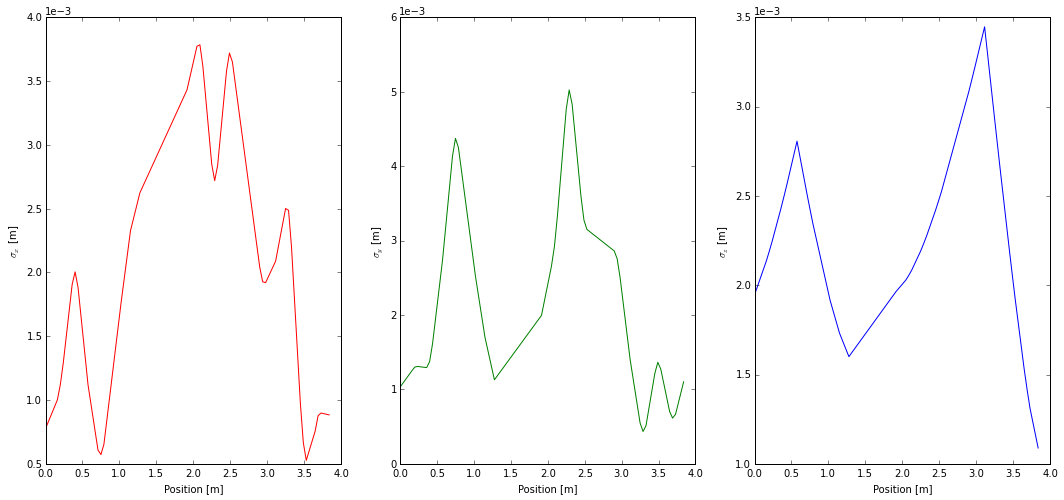

In [44]:
interactive(PlayWithQuad, QP1Field=(-20.0, 20.0))